In [ ]:
# Regression models

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('D:/ExcelR/A18 forecasting/Airlines+Data.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
data["month"] = data.Month.dt.strftime("%m") # month extraction
data["year"] = data.Month.dt.strftime("%Y") # year extraction

In [6]:
data.head()

,Month,Passengers,month,year
0,1995-01-01,112,01,1995
1,1995-02-01,118,02,1995
2,1995-03-01,132,03,1995
3,1995-04-01,129,04,1995
4,1995-05-01,121,05,1995


In [7]:
data = pd.get_dummies(data,columns=['month'])

In [8]:
data.head()

,Month,Passengers,year,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,1995-01-01,112,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [10]:
data = data.rename(columns={'month_01':'Jan' , 'month_02':'Feb' , 'month_03':'Mar' ,
                     'month_04':'Apr' , 'month_05':'May' , 'month_06':'Jun' ,
                     'month_07':'Jul' , 'month_08':'Aug' , 'month_09':'Sep' ,
                     'month_10':'Oct' , 'month_11':'Nov' , 'month_12':'Dec'})

In [11]:
data.head()

,Month,Passengers,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,1,0,0,0,0,0,0,0


In [12]:
t = np.arange(1,97)
data['t'] = t
data['t_square'] = data['t']*data['t']
log_Sales = np.log(data['Passengers'])
data['log_Sales'] = log_Sales
data.head()

,Month,Passengers,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,log_Sales
0,1995-01-01,112,1995,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


In [13]:
train = data.head(76)
test = data.tail(20)

In [14]:
import statsmodels.formula.api as smf

In [15]:
#linear model
linear = smf.ols('Passengers~t',data=train).fit()
predlin = pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin = np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlin))**2))
rmselin

36.016377306903635

In [16]:
#quadratic model
quad = smf.ols('Passengers~t+t_square',data=train).fit()
predquad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquad))**2))
rmsequad

58.494274639472565

In [17]:
#exponential model
expo = smf.ols('log_Sales~t',data=train).fit()
predexp = pd.Series(expo.predict(pd.DataFrame(test['t'])))
rmseexpo = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

46.621543947193885

In [18]:
#additive seasonality
additive = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predadd = pd.Series(additive.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmseadd = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predadd))**2))
rmseadd

132.25413439949472

In [19]:
#additive seasonality with linear trend
addlinear = smf.ols('Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predaddlinear = pd.Series(addlinear.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmseaddlinear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

40.302874882960495

In [20]:
#additive seasonality with quadratic trend
addquad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predaddquad = pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmseaddquad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

39.75976633806478

In [21]:
#multiplicative seasonality
mulsea = smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predmul = pd.Series(mulsea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmsemul = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

137.61090856256473

In [22]:
#multiplicative seasonality with linear trend
mullin = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predmullin = pd.Series(mullin.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmsemulin = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

11.784250178871469

In [23]:
#multiplicative seasonality with quadratic trend
mul_quad = smf.ols('log_Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_mul_quad = pd.Series(mul_quad.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_mul_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

35.61106241539281

In [24]:
summary = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
           'RMSE':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
summary = pd.DataFrame(summary)
summary.sort_values(['RMSE'])

,Model,RMSE
7,rmsemulin,11.784250
0,rmse_mul_quad,35.611062
5,rmselin,36.016377
3,rmseaddquad,39.759766
2,rmseaddlinear,40.302875
4,rmseexpo,46.621544
8,rmsequad,58.494275
1,rmseadd,132.254134
6,rmsemul,137.610909


In [ ]:
# Data Driven Models

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [26]:
data = pd.read_excel('D:/ExcelR/A18 forecasting/Airlines+Data.xlsx')

In [27]:
t = np.arange(1,97)
data['t'] = t

In [28]:
data.head()

,Month,Passengers,t
0,1995-01-01,112,1
1,1995-02-01,118,2
2,1995-03-01,132,3
3,1995-04-01,129,4
4,1995-05-01,121,5


In [29]:
Train = data.head(76)
Test = data.tail(20)

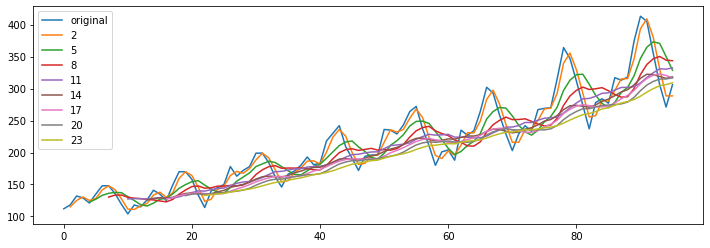

In [32]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="original")
for i in range(2,25,3):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

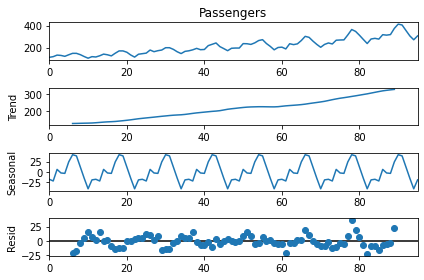

In [33]:
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

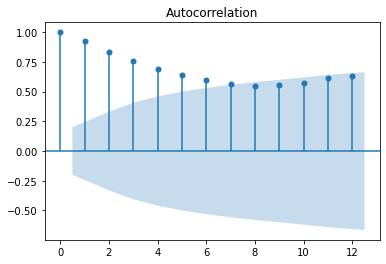

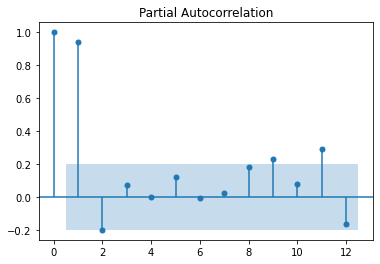

In [34]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

In [35]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [36]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

C:\Users\Patel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


20.42662205955859

In [37]:
# Holt method
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

C:\Users\Patel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


12.962869135426548

In [38]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

C:\Users\Patel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


8.723724919128461

In [39]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

C:\Users\Patel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


9.375468102339342

In [ ]:
# ARIMA model

In [40]:
import pandas as pd
import numpy as np

In [44]:
data = pd.read_excel('D:/ExcelR/A18 forecasting/Airlines+Data.xlsx',index_col=0,parse_dates=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [46]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<AxesSubplot:xlabel='Month'>

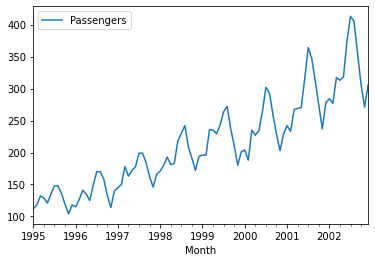

In [47]:
data.plot()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

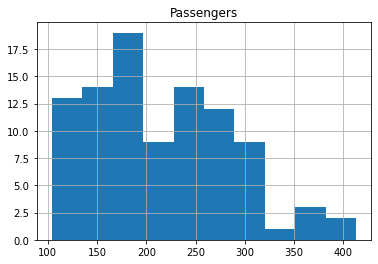

In [48]:
data.hist()

<AxesSubplot:ylabel='Density'>

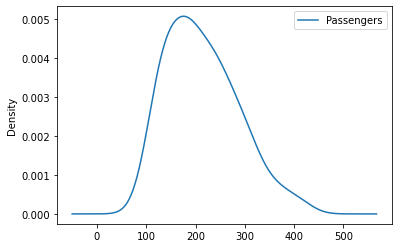

In [49]:
data.plot(kind='kde')

In [50]:
split_point = len(data) - 20
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('airline_dataset.csv', header=False)
validation.to_csv('airline_validation.csv', header=False)

Dataset 76, Validation 20


In [51]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [52]:
train = read_csv('airline_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [53]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=180.000, Expected=193.000
>Predicted=193.000, Expected=181.000
>Predicted=181.000, Expected=183.000
>Predicted=183.000, Expected=218.000
>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>

In [54]:
from statsmodels.tsa.arima_model import ARIMA

In [55]:
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [56]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [57]:
import warnings
train = read_csv('airline_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

In [58]:
# load data
train = read_csv('airline_dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

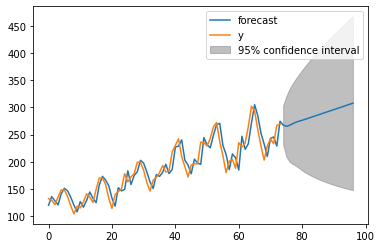

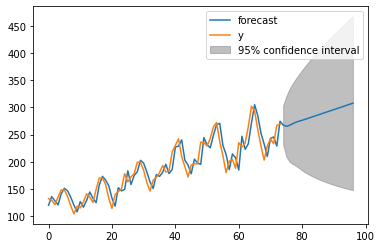

In [61]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=20)[0]
model_fit.plot_predict(1, 97)

In [62]:
#Error on the test data
val=pd.read_csv('airline_validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

55.80015623399488